# Real-time Election Results: Portugal 2019 Data Set

https://archive.ics.uci.edu/ml/datasets/Real-time+Election+Results%3A+Portugal+2019

Data Set Information:

A data set describing the evolution of results in the Portuguese Parliamentary Elections of October 6th 2019.
The data spans a time interval of 4 hours and 25 minutes, in intervals of 5 minutes, concerning the results of the 27 
parties involved in the electoral event.The data set is tailored for predictive modelling tasks, mostly focused on 
numerical forecasting tasks.Regardless, it allows for other tasks such as ordinal regression or learn-to-rankProvide
a short description of your data set (less than 200 characters).

Additional (and updated) information may be found in [Web Link] :
- Raw data sets
- R code to build the final data set
- Basic operations to build predictive modelling tasks using this data set

Attribute Information:
TimeElapsed (Numeric): Time (minutes) passed since the first data acquisition

time (timestamp): Date and time of the data acquisition

territoryName (string): Short name of the location (district or nation-wide)

totalMandates (numeric): MP's elected at the moment

availableMandates (numeric): MP's left to elect at the moment

numParishes (numeric): Total number of parishes in this location

numParishesApproved (numeric): Number of parishes approved in this location

blankVotes (numeric): Number of blank votes

blankVotesPercentage (numeric): Percentage of blank votes

nullVotes (numeric): Number of null votes

nullVotesPercentage (numeric): Percentage of null votes

votersPercentage (numeric): Percentage of voters

subscribedVoters (numeric): Number of subscribed voters in the location

totalVoters (numeric): Percentage of blank votes

pre.blankVotes (numeric): Number of blank votes (previous election)

pre.blankVotesPercentage (numeric): Percentage of blank votes (previous election)

pre.nullVotes (numeric): Number of null votes (previous election)

pre.nullVotesPercentage (numeric): Percentage of null votes (previous election)

pre.votersPercentage (numeric): Percentage of voters (previous election)

pre.subscribedVoters (numeric): Number of subscribed voters in the location (previous election)

pre.totalVoters (numeric): Percentage of blank votes (previous election)

Party (string): Political Party

Mandates (numeric): MP's elected at the moment for the party in a given district

Percentage (numeric): Percentage of votes in a party

validVotesPercentage (numeric): Percentage of valid votes in a party

Votes (numeric): Percentage of party votes

Hondt (numeric): Number of MP's according to the distribution of votes now

FinalMandates (numeric): Target: final number of elected MP's in a district/national-level
        
So here we will use different regression methods to test wheather which model is predicting FinalMandates of election results.

# 1-Data Exploration (Reading the data and Attributes name)

In [1]:
#Importing all basic required libray
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#lets import the dataset
electiondata=pd.read_csv('ElectionData.csv')
print(electiondata.shape)

(21643, 28)


In [3]:
#lets print the data
print(electiondata.head())

   TimeElapsed                 time        territoryName  totalMandates  \
0            0  2019-10-06 20:10:02  Território Nacional              0   
1            0  2019-10-06 20:10:02  Território Nacional              0   
2            0  2019-10-06 20:10:02  Território Nacional              0   
3            0  2019-10-06 20:10:02  Território Nacional              0   
4            0  2019-10-06 20:10:02  Território Nacional              0   

   availableMandates  numParishes  numParishesApproved  blankVotes  \
0                226         3092                 1081        9652   
1                226         3092                 1081        9652   
2                226         3092                 1081        9652   
3                226         3092                 1081        9652   
4                226         3092                 1081        9652   

   blankVotesPercentage  nullVotes  ...  pre.votersPercentage  \
0                   2.5       8874  ...                 52.66  

# 2-Exploratory Data Analysis (Exploring, Cleaning, Imputing & Visualizing)

In [4]:
#checking the information of the data and is there any null values present or not
print(electiondata.info())

#so here we saw there are no missing data present in dataset.
#only territoryName and Party attributes has datatype as object, so we will treat them later.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               21643 non-null  int64  
 1   time                      21643 non-null  object 
 2   territoryName             21643 non-null  object 
 3   totalMandates             21643 non-null  int64  
 4   availableMandates         21643 non-null  int64  
 5   numParishes               21643 non-null  int64  
 6   numParishesApproved       21643 non-null  int64  
 7   blankVotes                21643 non-null  int64  
 8   blankVotesPercentage      21643 non-null  float64
 9   nullVotes                 21643 non-null  int64  
 10  nullVotesPercentage       21643 non-null  float64
 11  votersPercentage          21643 non-null  float64
 12  subscribedVoters          21643 non-null  int64  
 13  totalVoters               21643 non-null  int64  
 14  pre.bl

In [5]:
#lets check is there any duplicate data present in the dataset
electiondata.duplicated().sum()

0

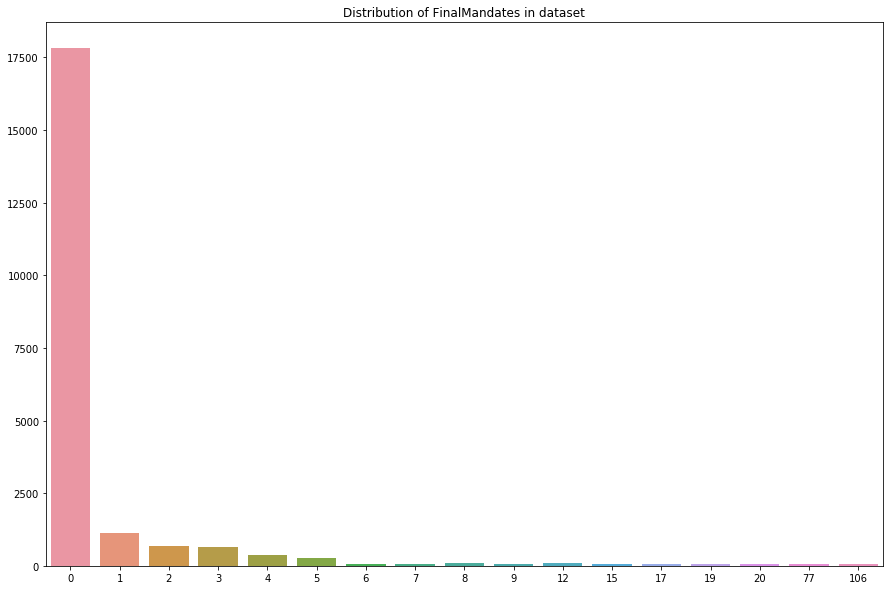

In [9]:
# now lets see the distribution of "FinalMandates" in the dataset
plt.figure(figsize=(15,10))
plt.title('Distribution of FinalMandates in dataset')
y = electiondata["FinalMandates"].value_counts()
sns.barplot(y.index, y.values)

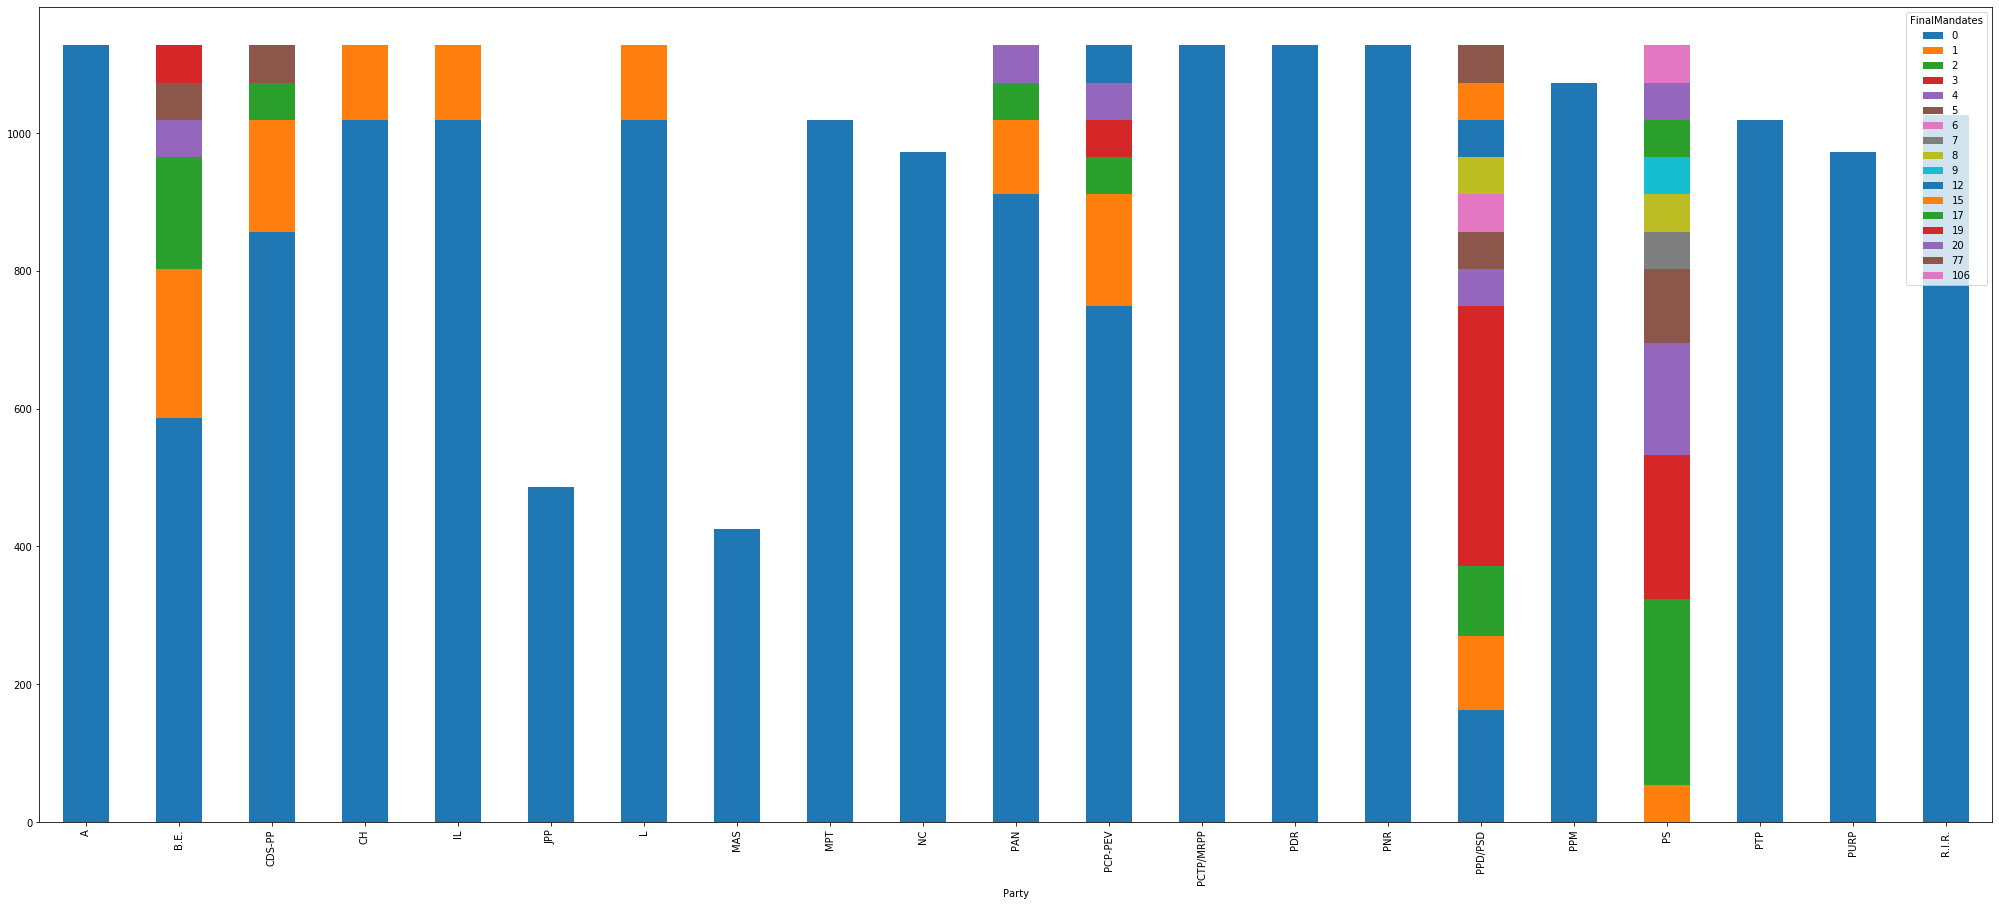

In [20]:
#lets see the FinalMandates data distribution of Party wise
electiondata.groupby(['Party', 'FinalMandates']).size().unstack().plot(kind='bar', stacked=True,figsize=(35,15))
plt.show()

     Party  FinalMandates
0       PS          11427
1  PPD/PSD           8302
2     B.E.           2052
3  PCP-PEV           1296
4   CDS-PP            540


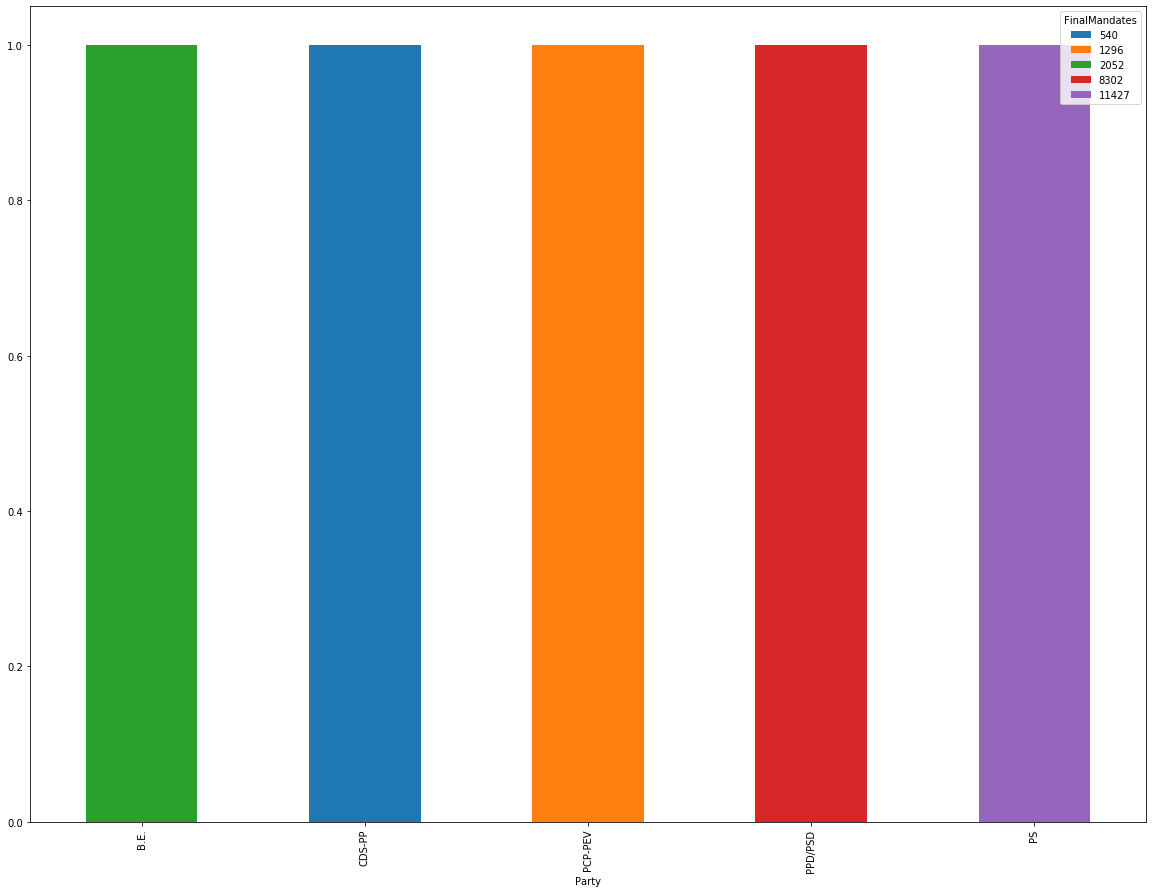

In [35]:
#lets see the top 5 FinalMandates of Party wise
top_cases=electiondata[['FinalMandates','Party']].groupby('Party').sum().sort_values('FinalMandates',ascending=False).head()
top_cases=top_cases.reset_index()
print(top_cases)
top_cases.groupby(['Party','FinalMandates']).size().unstack().plot(kind='bar', stacked=True, figsize=(20,15))
plt.show()

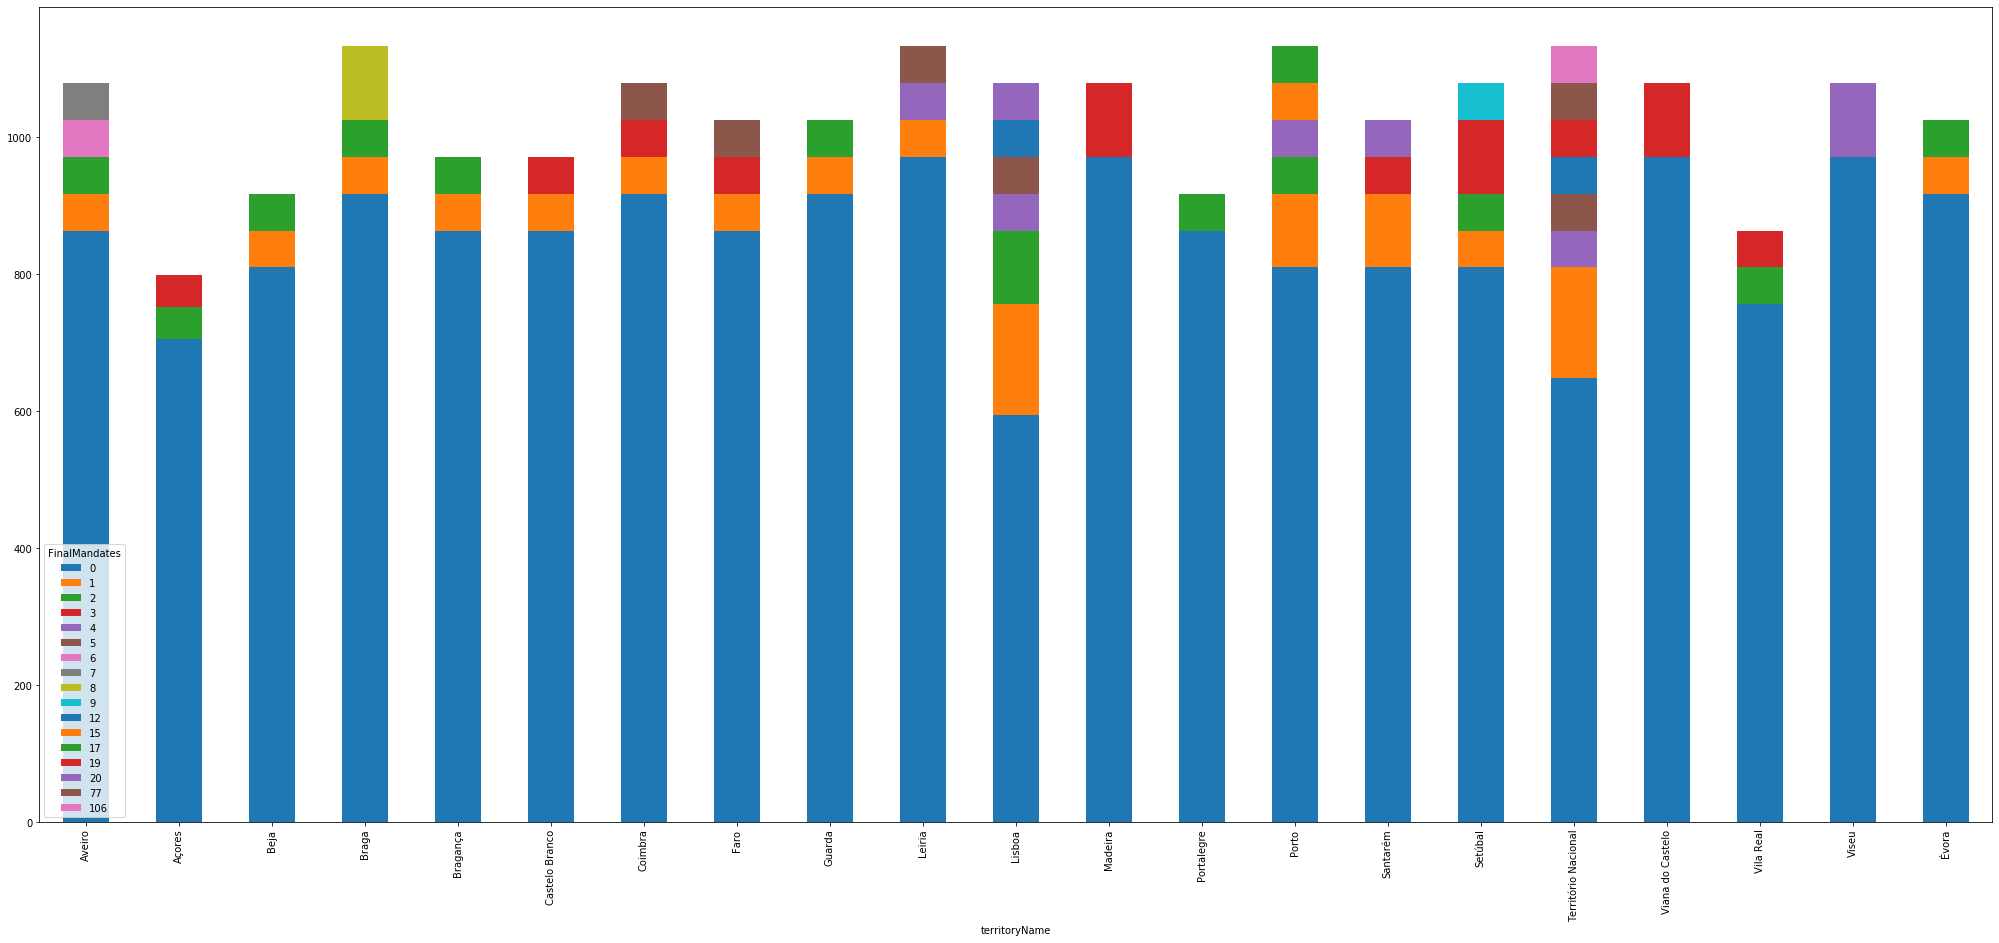

In [12]:
#lets see the FinalMandates data distribution based on territoryName
electiondata.groupby(["territoryName", "FinalMandates"]).size().unstack().plot(kind='bar', stacked=True,figsize=(35,15))
plt.show()

         territoryName  FinalMandates
0  Território Nacional          12204
1               Lisboa           2592
2                Porto           2160
3                Braga           1026
4              Setúbal            972


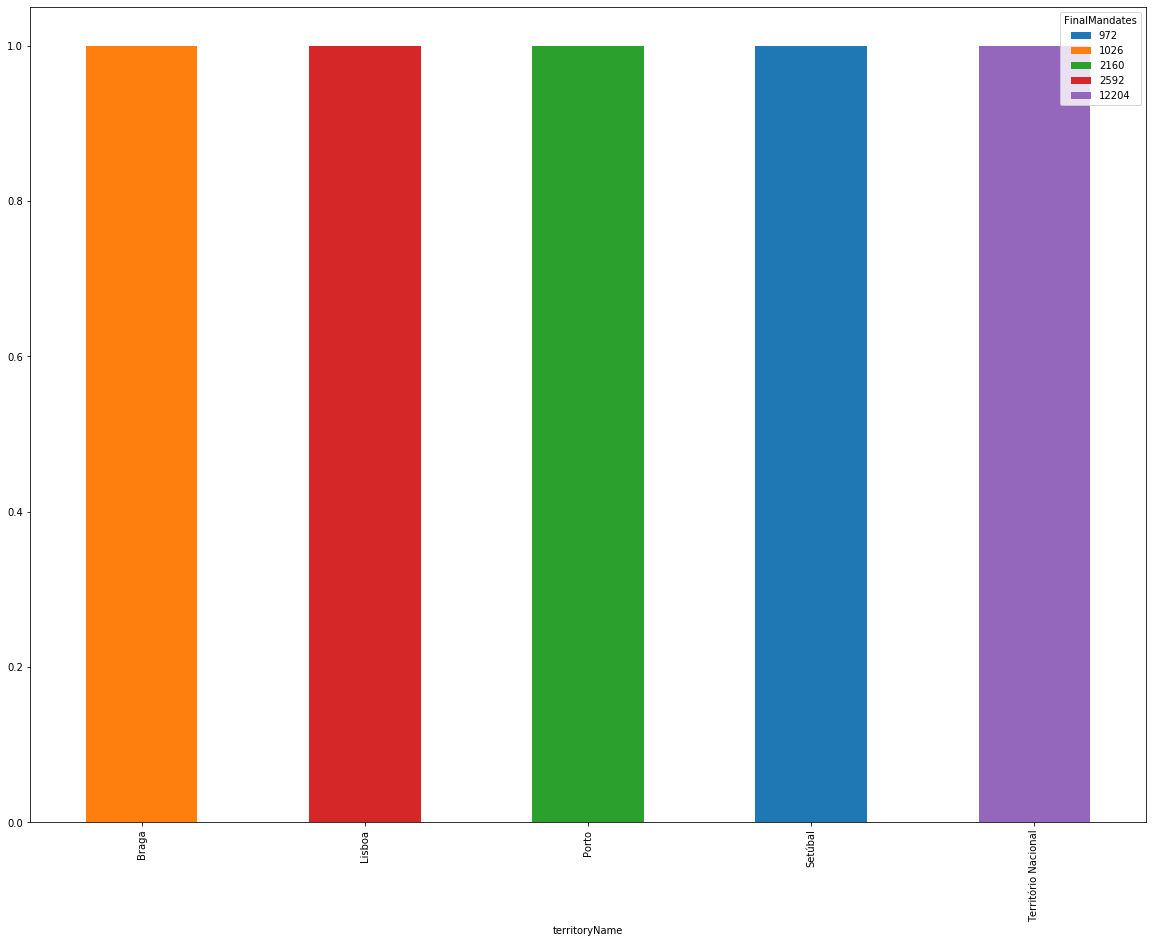

In [33]:
#lets see the top 5 FinalMandates based on territoryName
top_cases=electiondata[['FinalMandates','territoryName']].groupby('territoryName').sum().sort_values('FinalMandates',ascending=False).head()
top_cases=top_cases.reset_index()
print(top_cases)
top_cases.groupby(['territoryName', 'FinalMandates']).size().unstack().plot(kind='bar', stacked=True, figsize=(20,15))
plt.show()

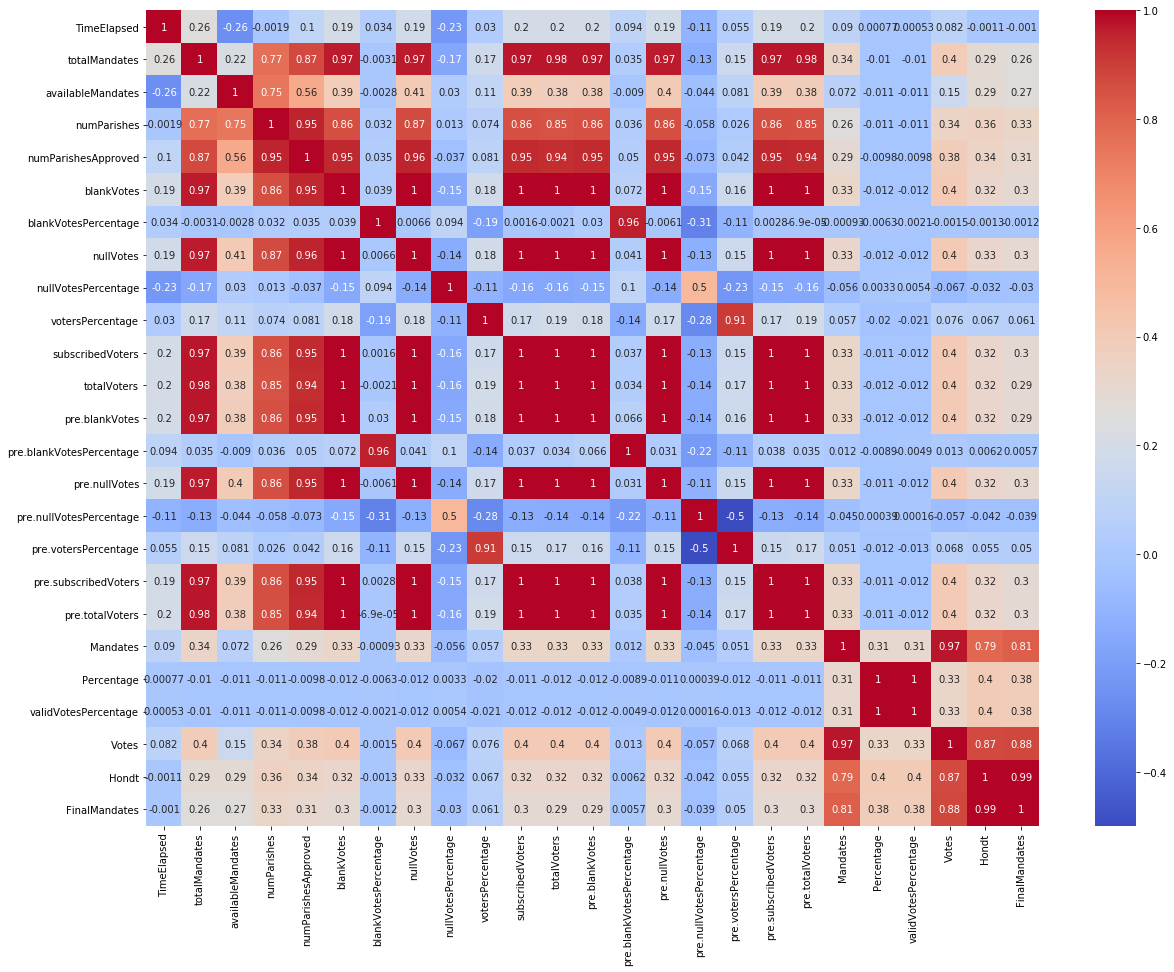

In [36]:
#lets see the corelation among data
plt.figure(figsize=(20,15))
sns.heatmap(electiondata.corr(),cmap='coolwarm',annot=True)

#so here by looking the corelation between data, we can say that almost every attribute has palying some role for predicting FinalMandates.

In [37]:
#so here by looking the data we can drop TimeElapsed and time attributes from our dataset
electiondata=electiondata.drop(columns=['TimeElapsed','time'])
print(electiondata.shape)
print(electiondata.head())

(21643, 26)
         territoryName  totalMandates  availableMandates  numParishes  \
0  Território Nacional              0                226         3092   
1  Território Nacional              0                226         3092   
2  Território Nacional              0                226         3092   
3  Território Nacional              0                226         3092   
4  Território Nacional              0                226         3092   

   numParishesApproved  blankVotes  blankVotesPercentage  nullVotes  \
0                 1081        9652                   2.5       8874   
1                 1081        9652                   2.5       8874   
2                 1081        9652                   2.5       8874   
3                 1081        9652                   2.5       8874   
4                 1081        9652                   2.5       8874   

   nullVotesPercentage  votersPercentage  ...  pre.votersPercentage  \
0                  2.3             51.36  ...      

In [38]:
#now territoryName and Party attributes has datatype as object,
#so we will convert them to numerical by using label encoder.
cat_data=['territoryName','Party']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_data:
    electiondata[i] = le.fit_transform(electiondata[i])

In [39]:
#again checking the information of the data
electiondata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   territoryName             21643 non-null  int32  
 1   totalMandates             21643 non-null  int64  
 2   availableMandates         21643 non-null  int64  
 3   numParishes               21643 non-null  int64  
 4   numParishesApproved       21643 non-null  int64  
 5   blankVotes                21643 non-null  int64  
 6   blankVotesPercentage      21643 non-null  float64
 7   nullVotes                 21643 non-null  int64  
 8   nullVotesPercentage       21643 non-null  float64
 9   votersPercentage          21643 non-null  float64
 10  subscribedVoters          21643 non-null  int64  
 11  totalVoters               21643 non-null  int64  
 12  pre.blankVotes            21643 non-null  int64  
 13  pre.blankVotesPercentage  21643 non-null  float64
 14  pre.nu

In [42]:
# Now our data is ready for model building, so split them into input and output/target variables
import numpy as np
dx=electiondata.drop(columns=['FinalMandates'],axis=1)
y=electiondata[['FinalMandates']]

print(x.shape)
print(y.shape)

(21643, 25)
(21643, 1)


In [43]:
#scaling the input variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(dx)
x=pd.DataFrame(x,columns=dx.columns)

# 3-Building Different Model and Finding the Best Model

In [44]:
#lets print the shape of both input and target dataset
print(x.shape)
print(y.shape)

(21643, 25)
(21643, 1)


In [45]:
#defining the models which will be used for model building
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
from sklearn.linear_model import Lasso
lsreg=Lasso()
from sklearn.linear_model import Ridge
lrreg=Ridge()
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [46]:
#appending all the models
models=[]
models.append(('LinearRegression',lreg))
models.append(('KNeighborsRegressor',knn))
models.append(('Lasso',lsreg))
models.append(('Ridge',lrreg))
models.append(('GradientBoostingRegressor',gbr))
models.append(('AdaBoostRegressor',ada))
models.append(('RandomForestRegressor',rf))

In [47]:
#printing the output of each model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
Model=[]
RState=[]
score=[]
for name, model in models:
    print('************************',name,'**********************')
    print('\n')
    Model.append(name)
    max_r2_score=0.0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=r_state)
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r2_score:
            max_r2_score=r2_scr
            final_r_state=r_state
    print('Final Random State is:', final_r_state)
    print('\n')
    RState.append(final_r_state*1)
    print('R2 Score is:', max_r2_score)
    print('\n')
    score.append(max_r2_score*100)
    print('\n')

************************ LinearRegression **********************


Final Random State is: 61


R2 Score is: 0.9952016409166936




************************ KNeighborsRegressor **********************


Final Random State is: 89


R2 Score is: 0.9997047196238866




************************ Lasso **********************


Final Random State is: 55


R2 Score is: 0.9754913061728824




************************ Ridge **********************


Final Random State is: 61


R2 Score is: 0.9951945571618589




************************ GradientBoostingRegressor **********************


Final Random State is: 93


R2 Score is: 0.9996383181507896




************************ AdaBoostRegressor **********************


Final Random State is: 58


R2 Score is: 0.9982915447884047




************************ RandomForestRegressor **********************


Final Random State is: 57


R2 Score is: 0.999995099954434






In [48]:
#lets print the final result of all the models
result=pd.DataFrame({'Model':Model,'Random_State':RState,'R2_Score':score})
print(result)

                       Model  Random_State   R2_Score
0           LinearRegression            61  99.520164
1        KNeighborsRegressor            89  99.970472
2                      Lasso            55  97.549131
3                      Ridge            61  99.519456
4  GradientBoostingRegressor            93  99.963832
5          AdaBoostRegressor            58  99.829154
6      RandomForestRegressor            57  99.999510


In [49]:
## So here RandomForestRegressor is the best model,hence building the final model with random_state=57.

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=57)
rfreg=RandomForestRegressor()
rfreg.fit(x_train,y_train)
y_pred=rfreg.predict(x_test)
print('R2 score is:',r2_score(y_test,y_pred))
print('RMSE is:',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score is: 0.9999937896030542
RMSE is: 0.017455351749228794


In [50]:
#checking the mean r2 score and overfitting and underfitting using cross validation
from sklearn.model_selection import cross_val_score
print('Mean R2 score of RandomForestRegressor is:', cross_val_score(rfreg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation of RandomForestRegressor is:',cross_val_score(rfreg,x,y,cv=5,scoring='r2').std())

Mean R2 score of RandomForestRegressor is: 0.9778034044171771
Standard Deviation of RandomForestRegressor is: 0.03913232140726546


In [51]:
#lets see actual vs predict results
print('Actual FinalMandates:\n',y_test)
print('Predicted FinalMandates:\n',y_pred)

Actual FinalMandates:
        FinalMandates
992                0
12673              0
10247              1
4851               1
20916              0
...              ...
21191              0
12467              0
5409               4
17942              3
13261              0

[4329 rows x 1 columns]
Predicted FinalMandates:
 [0.   0.   1.   ... 3.98 3.   0.  ]


In [52]:
#saving the final model
from sklearn.externals import joblib
#save the model as joblib in a file
joblib.dump(rfreg,'election_absent.obj')

['election_absent.obj']

In [53]:
# load the model from the file
election_from_joblib=joblib.load('election_absent.obj')

In [54]:
#Use the loaded model to make predictions against test data
election_from_joblib.predict(x_test)

array([0.  , 0.  , 1.  , ..., 3.98, 3.  , 0.  ])

# Conclusion:
    
So here 'RandomForestRegressor Model' is the best model out of all model tested above and by looking this we can conclude
that our model is predicting nearly 100% of correct results for FinalMandates of election results based on the above dataset.